### **IONOSPHERE Dataset**

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:

url = 'https://raw.githubusercontent.com/Aqeel-0/phone.html/master/ionosphere_data.csv'
df = pd.read_csv(url)
df.head()
column_names = list(df.columns.values)

In [40]:
X = df.iloc[:,:-1]
y = df.iloc[: , -1]
dict_svm = {}
dict_mlp = {}
dict_rfr = {}
y.info(), X.info()

<class 'pandas.core.series.Series'>
RangeIndex: 351 entries, 0 to 350
Series name: column_ai
Non-Null Count  Dtype 
--------------  ----- 
351 non-null    object
dtypes: object(1)
memory usage: 2.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   column_a   351 non-null    bool   
 1   column_b   351 non-null    bool   
 2   column_c   351 non-null    float64
 3   column_d   351 non-null    float64
 4   column_e   351 non-null    float64
 5   column_f   351 non-null    float64
 6   column_g   351 non-null    float64
 7   column_h   351 non-null    float64
 8   column_i   351 non-null    float64
 9   column_j   351 non-null    float64
 10  column_k   351 non-null    float64
 11  column_l   351 non-null    float64
 12  column_m   351 non-null    float64
 13  column_n   351 non-null    float64
 14  column_o   351 non-null    float64
 15  column_p

(None, None)

In [41]:
def reports(y_test, y_pred):
  from sklearn.metrics import classification_report, confusion_matrix
  from sklearn.metrics import accuracy_score
  import seaborn as sns
  print("Confusion Matrix : ")
  cf_matrix = confusion_matrix(y_test, y_pred)
  group_names = ['True Neg','False Pos','False Neg','True Pos']
  group_counts = ["{0:0.0f}".format(value) for value in
                  cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', xticklabels=['Good', 'Bad'], yticklabels=['Good', 'Bad'])
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix')
  plt.show()



  print("**********************************************")
  print("Classification Evaluation : ")
  print(classification_report(y_test, y_pred, zero_division = 0))

### **SVM CLASSIFIER**

In [42]:
def SVMClassifier(split, kernalValue = 'rbf', degreeValue = 3, gammaValue = 'scale', maxIter = -1):
  from sklearn.model_selection import train_test_split
  from sklearn.svm import SVC
  from sklearn.metrics import accuracy_score
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  scaler.fit(X)
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = split, random_state=44)
  classifier = SVC(kernel = kernalValue, degree = degreeValue, gamma = gammaValue, max_iter = maxIter)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)

  if(str(split) in dict_svm):
    dict_svm[str(split)] = max(accuracy, dict_svm[str(split)])
  else:
    dict_svm[str(split)] = accuracy
  reports(y_test, y_pred)



Confusion Matrix : 


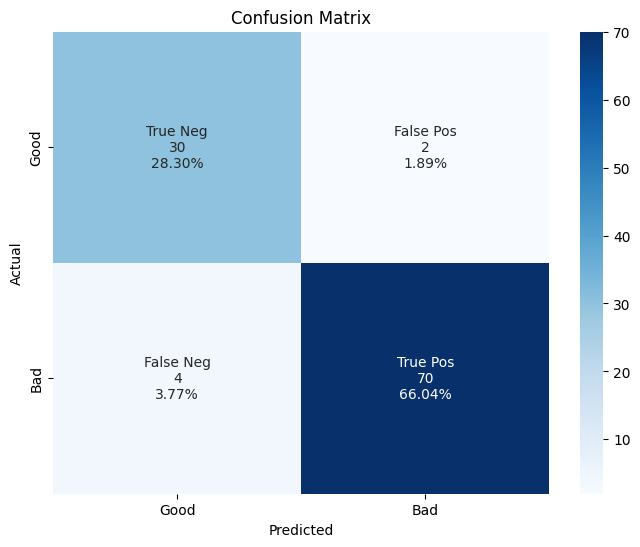

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           b       0.88      0.94      0.91        32
           g       0.97      0.95      0.96        74

    accuracy                           0.94       106
   macro avg       0.93      0.94      0.93       106
weighted avg       0.95      0.94      0.94       106

Confusion Matrix : 


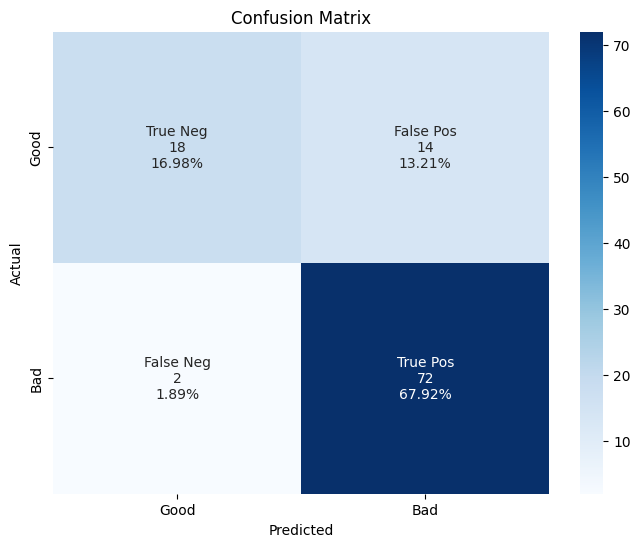

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           b       0.90      0.56      0.69        32
           g       0.84      0.97      0.90        74

    accuracy                           0.85       106
   macro avg       0.87      0.77      0.80       106
weighted avg       0.86      0.85      0.84       106

Confusion Matrix : 


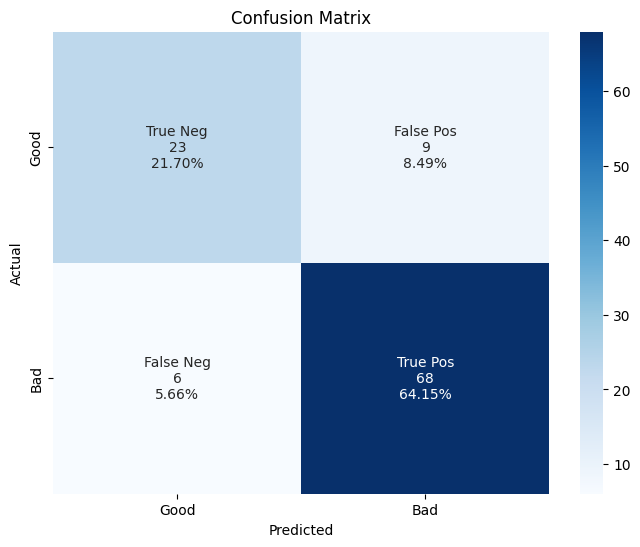

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           b       0.79      0.72      0.75        32
           g       0.88      0.92      0.90        74

    accuracy                           0.86       106
   macro avg       0.84      0.82      0.83       106
weighted avg       0.86      0.86      0.86       106

Confusion Matrix : 


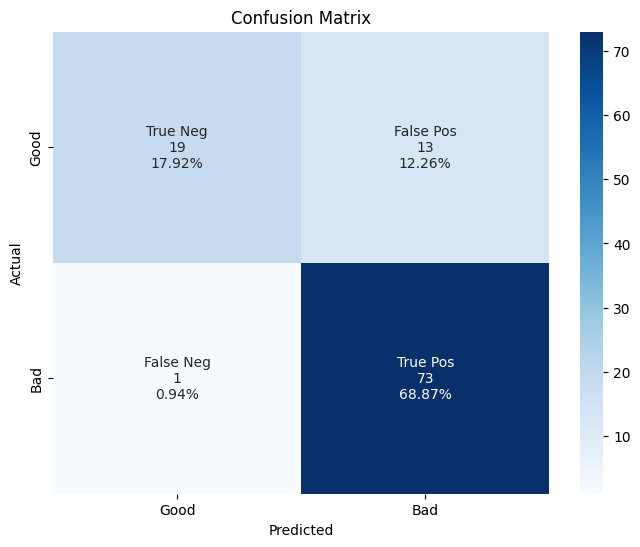

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           b       0.95      0.59      0.73        32
           g       0.85      0.99      0.91        74

    accuracy                           0.87       106
   macro avg       0.90      0.79      0.82       106
weighted avg       0.88      0.87      0.86       106



In [43]:
#Train - Test split 70-30
SVMClassifier(0.3, 'rbf', 3, 0.42)
SVMClassifier(0.3, 'linear', 3, 0.1)
SVMClassifier(0.3, 'poly', 5, )
SVMClassifier(0.3, 'sigmoid',3, 0.01)

Confusion Matrix : 


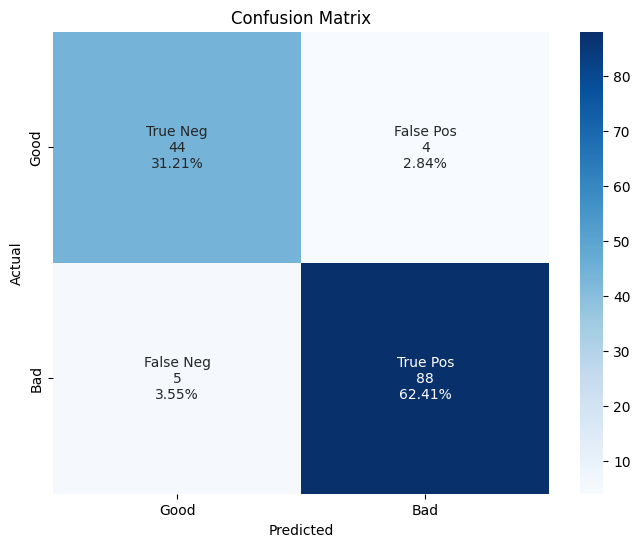

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           b       0.90      0.92      0.91        48
           g       0.96      0.95      0.95        93

    accuracy                           0.94       141
   macro avg       0.93      0.93      0.93       141
weighted avg       0.94      0.94      0.94       141

Confusion Matrix : 


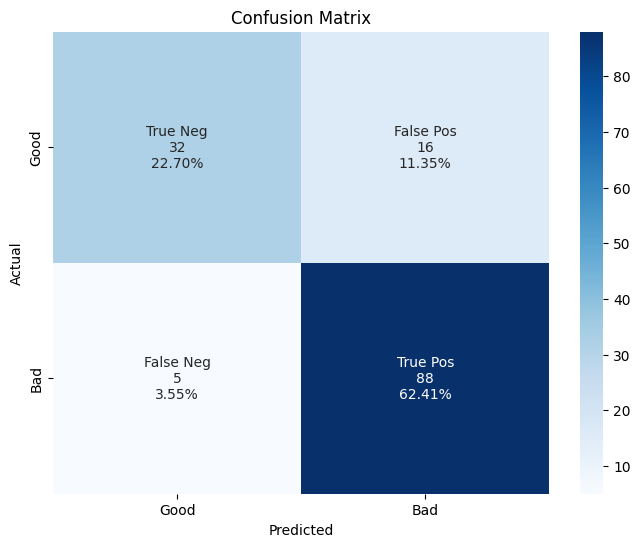

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           b       0.86      0.67      0.75        48
           g       0.85      0.95      0.89        93

    accuracy                           0.85       141
   macro avg       0.86      0.81      0.82       141
weighted avg       0.85      0.85      0.85       141

Confusion Matrix : 


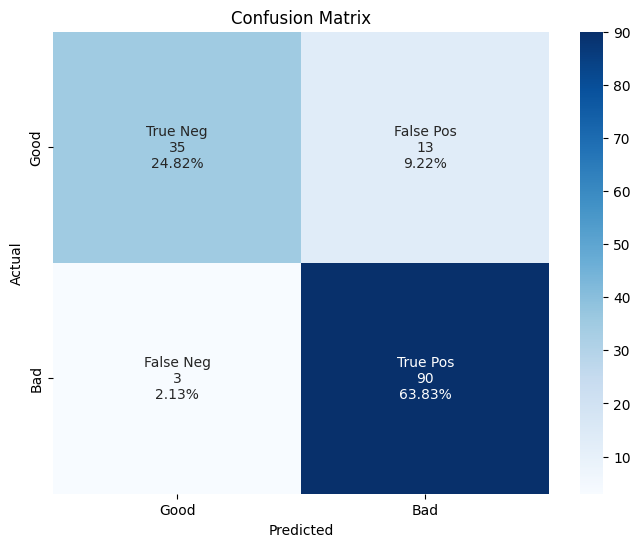

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           b       0.92      0.73      0.81        48
           g       0.87      0.97      0.92        93

    accuracy                           0.89       141
   macro avg       0.90      0.85      0.87       141
weighted avg       0.89      0.89      0.88       141

Confusion Matrix : 


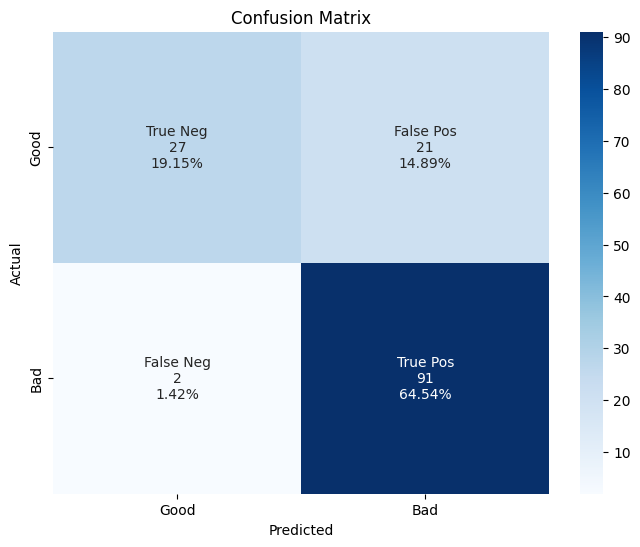

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           b       0.93      0.56      0.70        48
           g       0.81      0.98      0.89        93

    accuracy                           0.84       141
   macro avg       0.87      0.77      0.79       141
weighted avg       0.85      0.84      0.82       141



In [44]:
#Train - Test split 60-40
SVMClassifier(0.4, 'rbf', 3, 0.31)
SVMClassifier(0.4, 'linear', 3, 0.01)
SVMClassifier(0.4, 'poly', 5, )
SVMClassifier(0.4, 'sigmoid', 3, 0.01)

Confusion Matrix : 


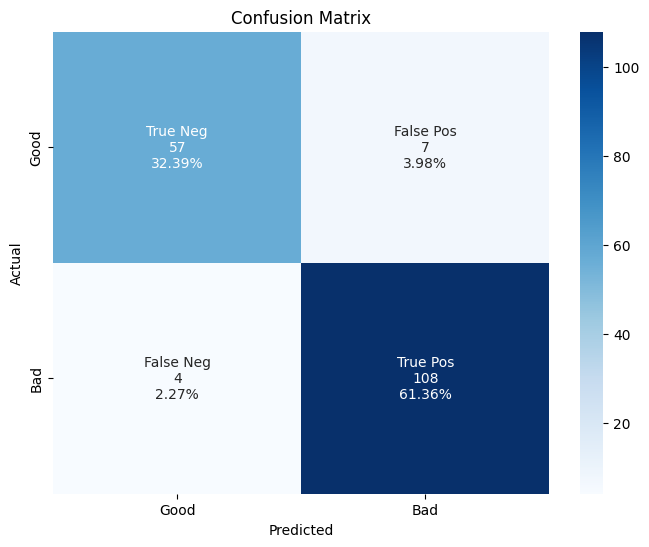

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           b       0.93      0.89      0.91        64
           g       0.94      0.96      0.95       112

    accuracy                           0.94       176
   macro avg       0.94      0.93      0.93       176
weighted avg       0.94      0.94      0.94       176

Confusion Matrix : 


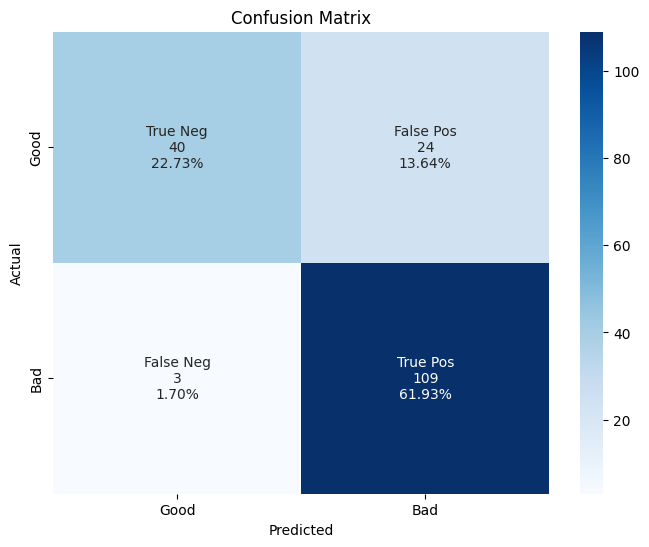

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           b       0.93      0.62      0.75        64
           g       0.82      0.97      0.89       112

    accuracy                           0.85       176
   macro avg       0.87      0.80      0.82       176
weighted avg       0.86      0.85      0.84       176

Confusion Matrix : 


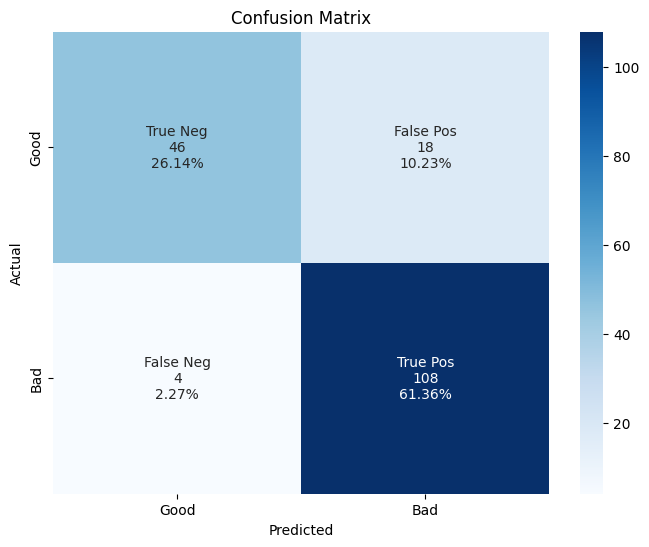

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           b       0.92      0.72      0.81        64
           g       0.86      0.96      0.91       112

    accuracy                           0.88       176
   macro avg       0.89      0.84      0.86       176
weighted avg       0.88      0.88      0.87       176

Confusion Matrix : 


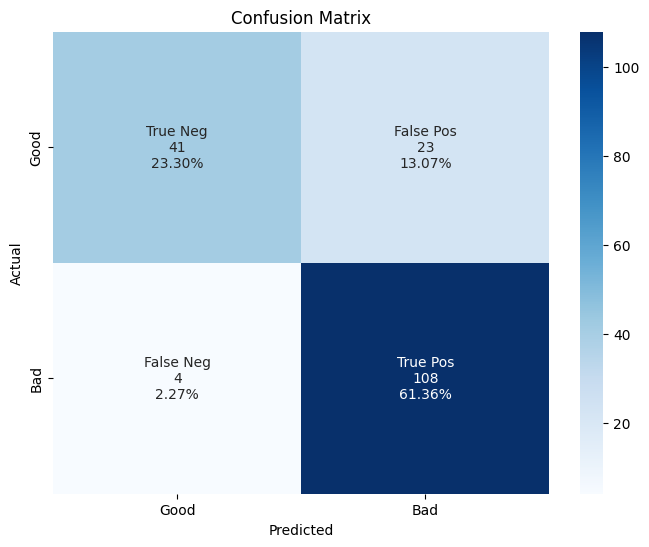

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           b       0.91      0.64      0.75        64
           g       0.82      0.96      0.89       112

    accuracy                           0.85       176
   macro avg       0.87      0.80      0.82       176
weighted avg       0.86      0.85      0.84       176



In [45]:
#Train - Test split 50-50
SVMClassifier(0.5, 'rbf', 3, 0.18)
SVMClassifier(0.5, 'linear', 3, )
SVMClassifier(0.5, 'poly', 4, )
SVMClassifier(0.5, 'sigmoid', 3, 0.09 ) #wrost performance

Confusion Matrix : 


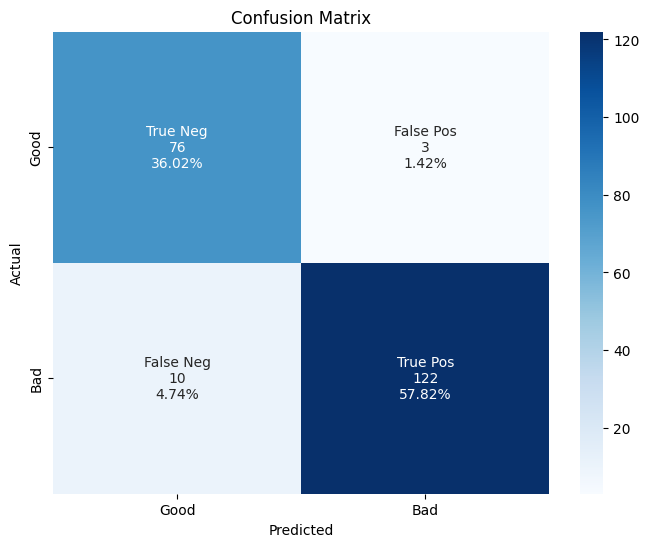

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           b       0.88      0.96      0.92        79
           g       0.98      0.92      0.95       132

    accuracy                           0.94       211
   macro avg       0.93      0.94      0.94       211
weighted avg       0.94      0.94      0.94       211

Confusion Matrix : 


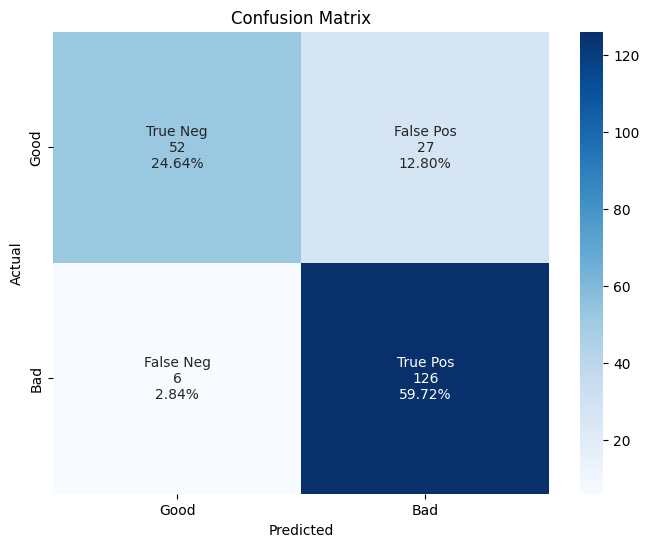

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           b       0.90      0.66      0.76        79
           g       0.82      0.95      0.88       132

    accuracy                           0.84       211
   macro avg       0.86      0.81      0.82       211
weighted avg       0.85      0.84      0.84       211

Confusion Matrix : 


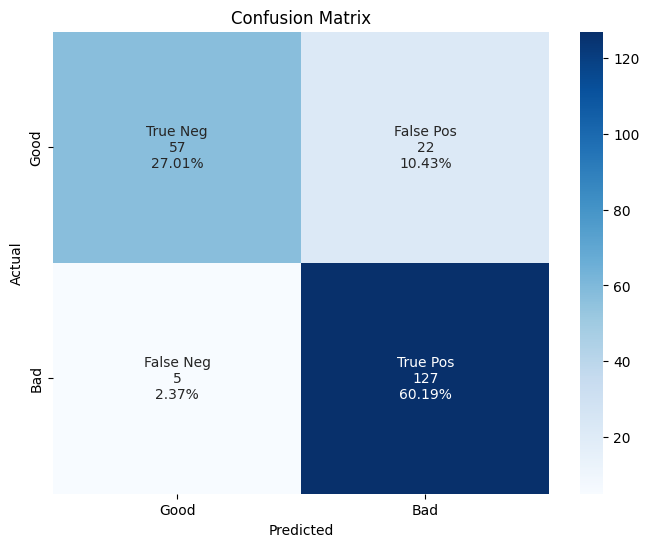

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           b       0.92      0.72      0.81        79
           g       0.85      0.96      0.90       132

    accuracy                           0.87       211
   macro avg       0.89      0.84      0.86       211
weighted avg       0.88      0.87      0.87       211

Confusion Matrix : 


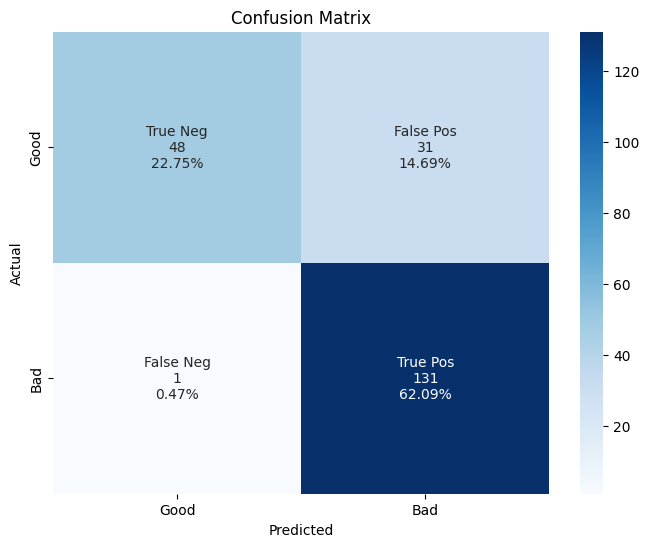

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           b       0.98      0.61      0.75        79
           g       0.81      0.99      0.89       132

    accuracy                           0.85       211
   macro avg       0.89      0.80      0.82       211
weighted avg       0.87      0.85      0.84       211



In [46]:
#Train - Test split 40-60
SVMClassifier(0.6, 'rbf', 3, 0.51)
SVMClassifier(0.6, 'linear', 3, )
SVMClassifier(0.6, 'poly', 2, 0.14)
SVMClassifier(0.6, 'sigmoid', 3,) #wrost performance

Confusion Matrix : 


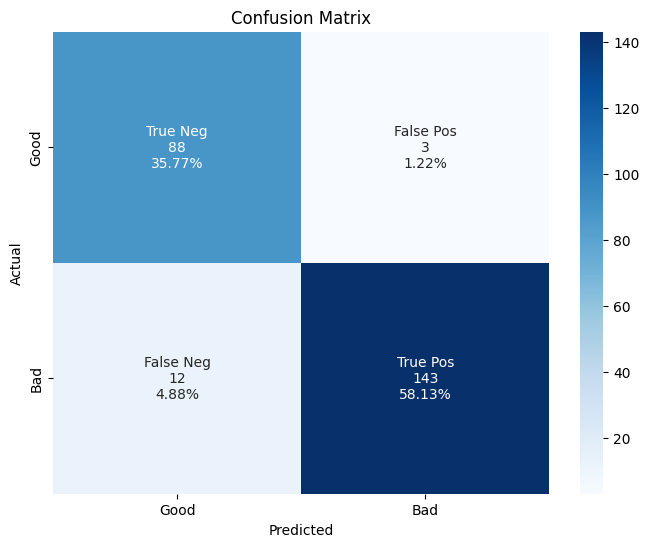

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           b       0.88      0.97      0.92        91
           g       0.98      0.92      0.95       155

    accuracy                           0.94       246
   macro avg       0.93      0.94      0.94       246
weighted avg       0.94      0.94      0.94       246

Confusion Matrix : 


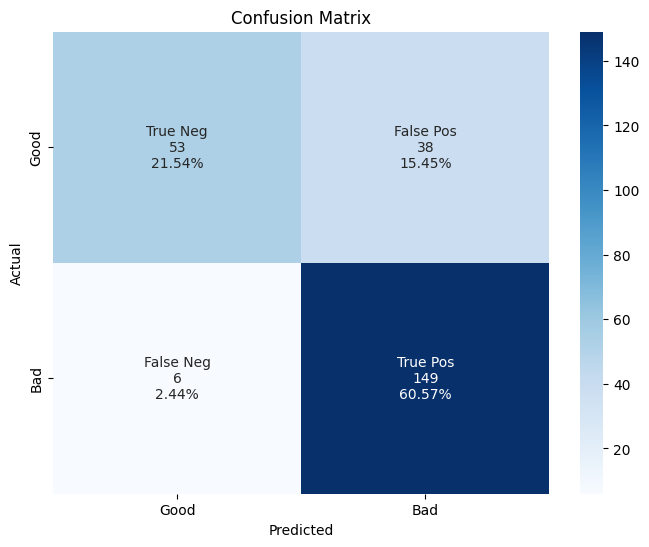

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           b       0.90      0.58      0.71        91
           g       0.80      0.96      0.87       155

    accuracy                           0.82       246
   macro avg       0.85      0.77      0.79       246
weighted avg       0.83      0.82      0.81       246

Confusion Matrix : 


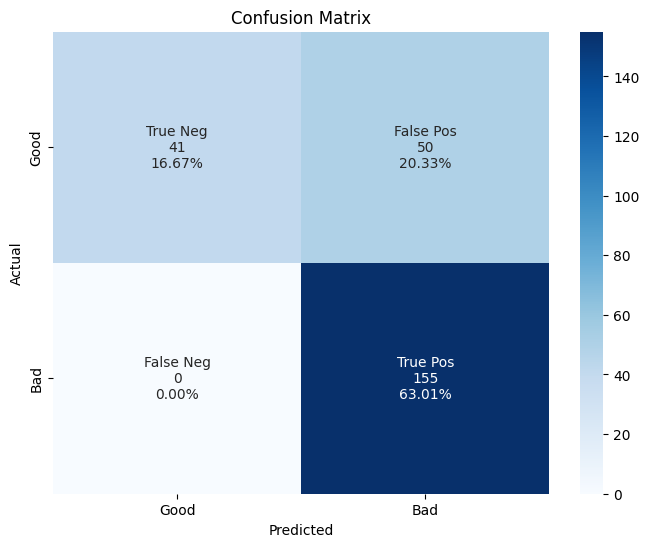

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           b       1.00      0.45      0.62        91
           g       0.76      1.00      0.86       155

    accuracy                           0.80       246
   macro avg       0.88      0.73      0.74       246
weighted avg       0.85      0.80      0.77       246

Confusion Matrix : 


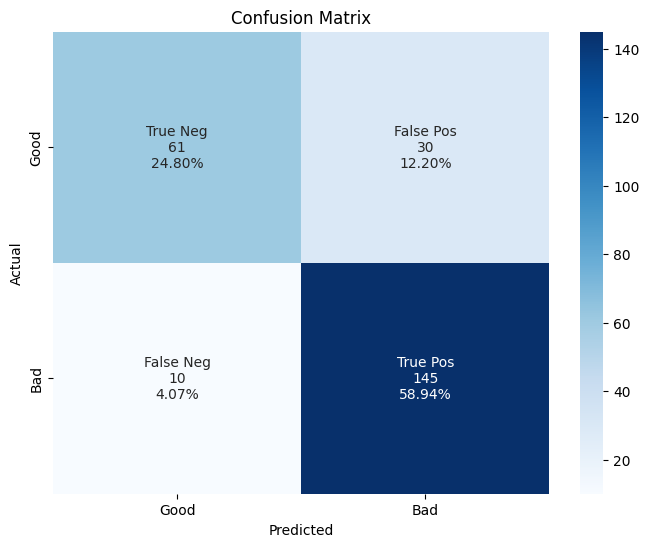

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           b       0.86      0.67      0.75        91
           g       0.83      0.94      0.88       155

    accuracy                           0.84       246
   macro avg       0.84      0.80      0.82       246
weighted avg       0.84      0.84      0.83       246



In [47]:
#Train - Test split 30-70
SVMClassifier(0.7, 'rbf', 3, 0.64)
SVMClassifier(0.7, 'linear')
SVMClassifier(0.7, 'poly', 2,)
SVMClassifier(0.7, 'sigmoid' ) #wrost performance

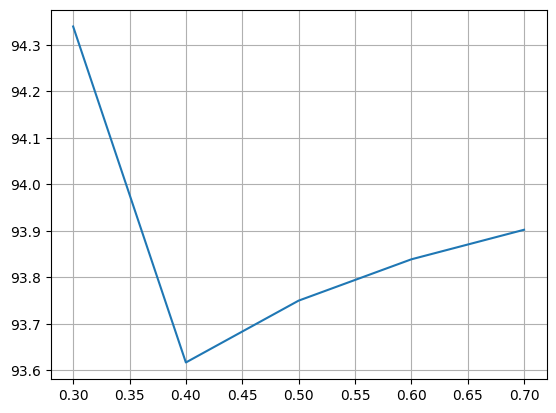

In [48]:
x_points = [float(key) for key in dict_svm]
y_points = [i*100 for i in dict_svm.values()]
plt.plot(x_points, y_points)
plt.grid(True)
plt.show()

### **MLP Classifier**

In [49]:
def MLPClassifier(split, hiddenLayerSize = [100, ], activationValue = 'relu', solverValue = 'adam'):
  from sklearn.model_selection import train_test_split
  from sklearn.neural_network import MLPClassifier
  from sklearn.metrics import accuracy_score
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  scaler.fit(X)
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = split, random_state=44)
  classifier = MLPClassifier(hidden_layer_sizes = hiddenLayerSize, activation = activationValue, solver = solverValue, random_state = 1)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  if(str(split) in dict_mlp):
    dict_mlp[str(split)] = max(accuracy, dict_mlp[str(split)])
  else:
    dict_mlp[str(split)] = accuracy
  print(dict_mlp)
  reports(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'0.3': 0.9433962264150944}
Confusion Matrix : 


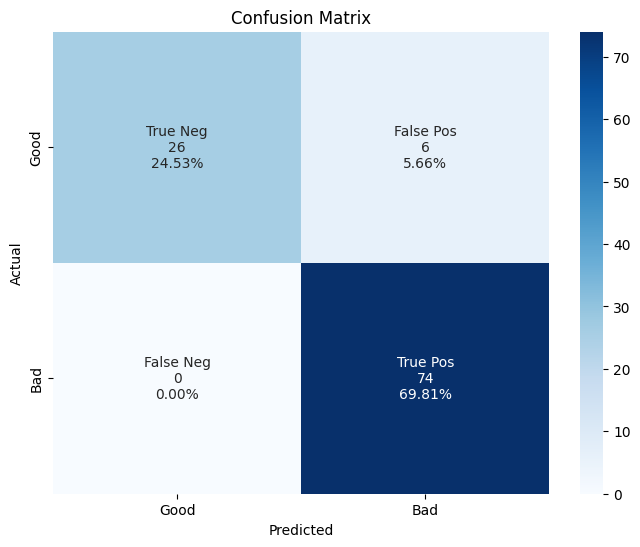

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           b       1.00      0.81      0.90        32
           g       0.93      1.00      0.96        74

    accuracy                           0.94       106
   macro avg       0.96      0.91      0.93       106
weighted avg       0.95      0.94      0.94       106



In [50]:
#Train - Test split 70-30
MLPClassifier(0.3, [80, 20])

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'0.3': 0.9433962264150944, '0.4': 0.9432624113475178}
Confusion Matrix : 


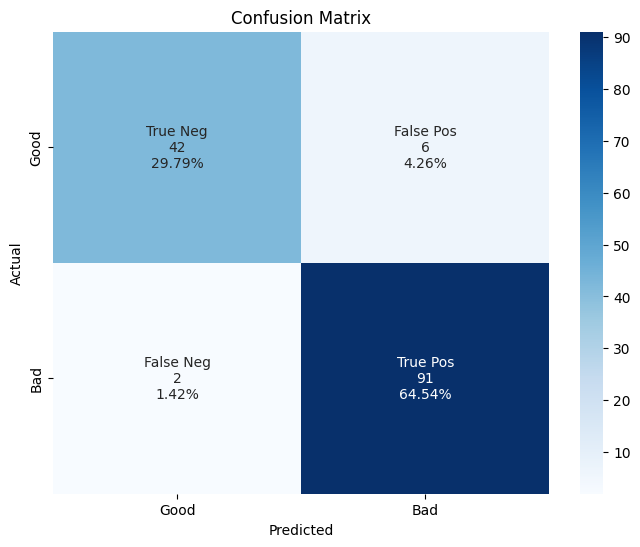

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           b       0.95      0.88      0.91        48
           g       0.94      0.98      0.96        93

    accuracy                           0.94       141
   macro avg       0.95      0.93      0.94       141
weighted avg       0.94      0.94      0.94       141



In [51]:
#Train - Test split 60-40
MLPClassifier(0.4, [80, 15])

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'0.3': 0.9433962264150944, '0.4': 0.9432624113475178, '0.5': 0.9204545454545454}
Confusion Matrix : 


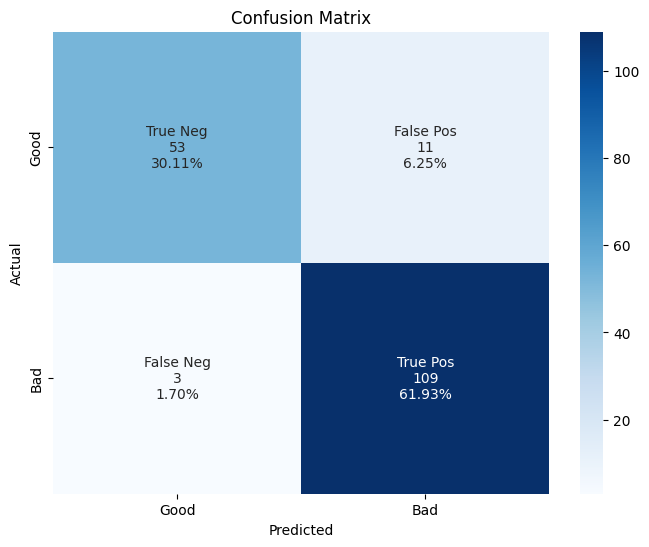

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           b       0.95      0.83      0.88        64
           g       0.91      0.97      0.94       112

    accuracy                           0.92       176
   macro avg       0.93      0.90      0.91       176
weighted avg       0.92      0.92      0.92       176



In [52]:
#Train - Test split 50-50
MLPClassifier(0.5, [80, 15])

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'0.3': 0.9433962264150944, '0.4': 0.9432624113475178, '0.5': 0.9204545454545454, '0.6': 0.9052132701421801}
Confusion Matrix : 


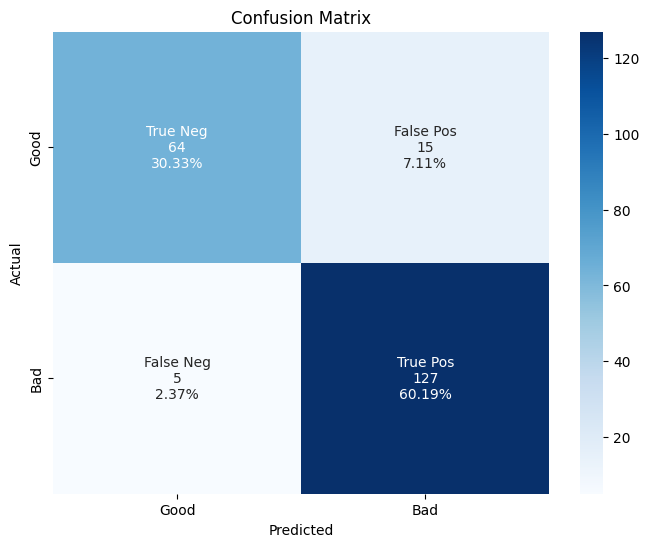

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           b       0.93      0.81      0.86        79
           g       0.89      0.96      0.93       132

    accuracy                           0.91       211
   macro avg       0.91      0.89      0.90       211
weighted avg       0.91      0.91      0.90       211



In [53]:
#Train - Test split 40-60
MLPClassifier(0.6, [80, 46])

{'0.3': 0.9433962264150944, '0.4': 0.9432624113475178, '0.5': 0.9204545454545454, '0.6': 0.9052132701421801, '0.7': 0.9024390243902439}
Confusion Matrix : 


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


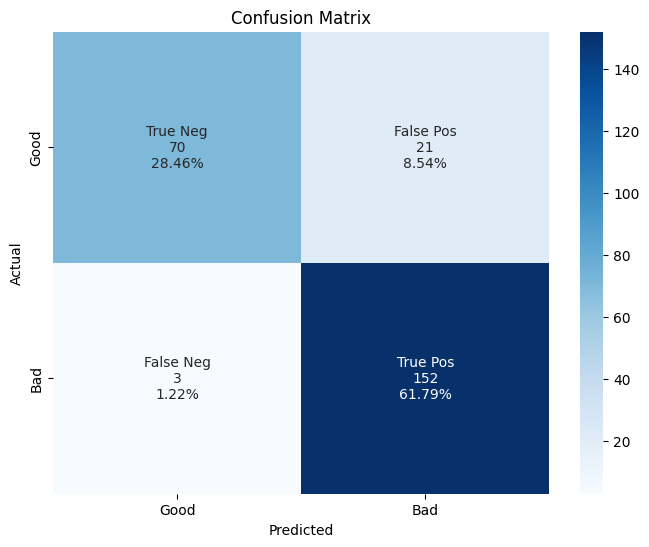

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           b       0.96      0.77      0.85        91
           g       0.88      0.98      0.93       155

    accuracy                           0.90       246
   macro avg       0.92      0.87      0.89       246
weighted avg       0.91      0.90      0.90       246



In [54]:
#Train - Test split 30-70
MLPClassifier(0.7, [50, 22])

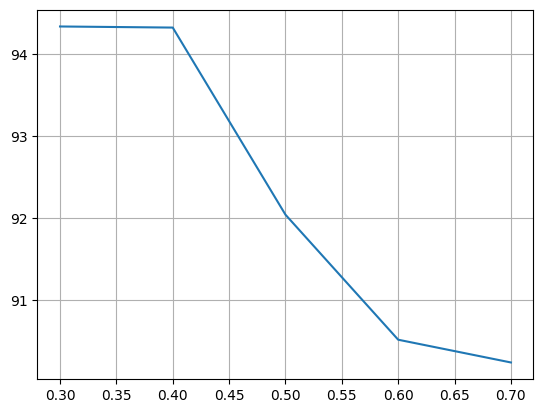

In [55]:
x_points = [float(key) for key in dict_mlp]
y_points = [i*100 for i in dict_mlp.values()]
plt.plot(x_points, y_points)
plt.grid(True)
plt.show()

In [56]:
def randomForest(split, estimator = 100, criterionValue = 'gini', ):
  from sklearn.model_selection import train_test_split
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.metrics import accuracy_score
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  scaler.fit(X)
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = split, random_state=44)
  classifier = RandomForestClassifier(n_estimators = estimator, criterion = criterionValue)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)

  if(str(split) in dict_rfr):
    dict_rfr[str(split)] = max(accuracy, dict_rfr[str(split)])
  else:
    dict_rfr[str(split)] = accuracy

  reports(y_test, y_pred)


Confusion Matrix : 


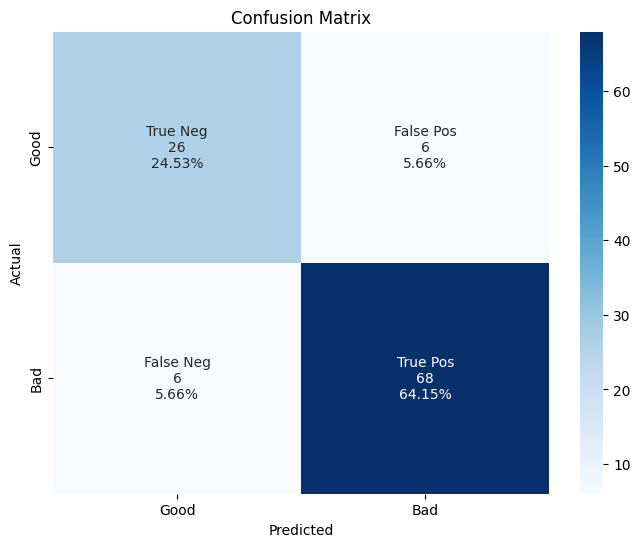

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           b       0.81      0.81      0.81        32
           g       0.92      0.92      0.92        74

    accuracy                           0.89       106
   macro avg       0.87      0.87      0.87       106
weighted avg       0.89      0.89      0.89       106



In [57]:
randomForest(0.3, 400)

Confusion Matrix : 


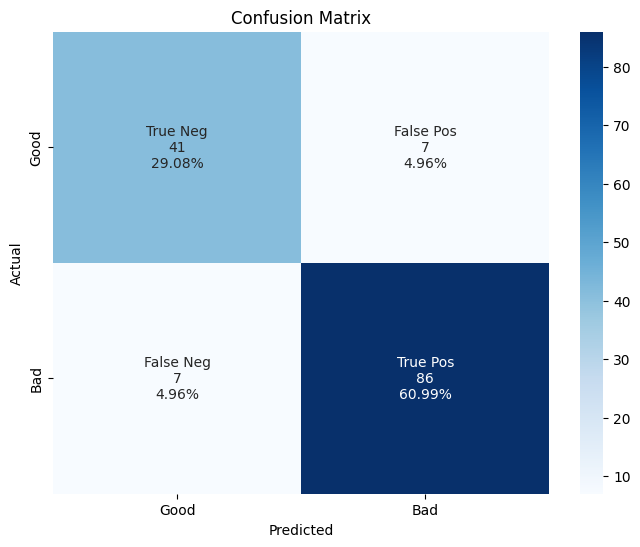

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           b       0.85      0.85      0.85        48
           g       0.92      0.92      0.92        93

    accuracy                           0.90       141
   macro avg       0.89      0.89      0.89       141
weighted avg       0.90      0.90      0.90       141



In [58]:
randomForest(0.4)

Confusion Matrix : 


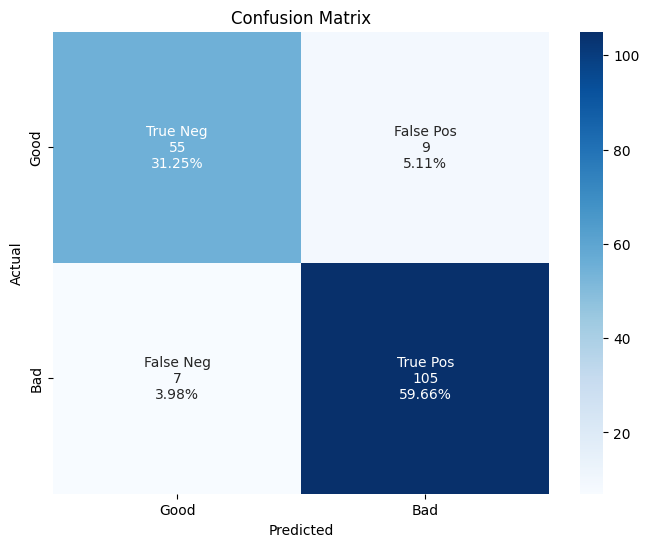

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           b       0.89      0.86      0.87        64
           g       0.92      0.94      0.93       112

    accuracy                           0.91       176
   macro avg       0.90      0.90      0.90       176
weighted avg       0.91      0.91      0.91       176



In [59]:
randomForest(0.5)

Confusion Matrix : 


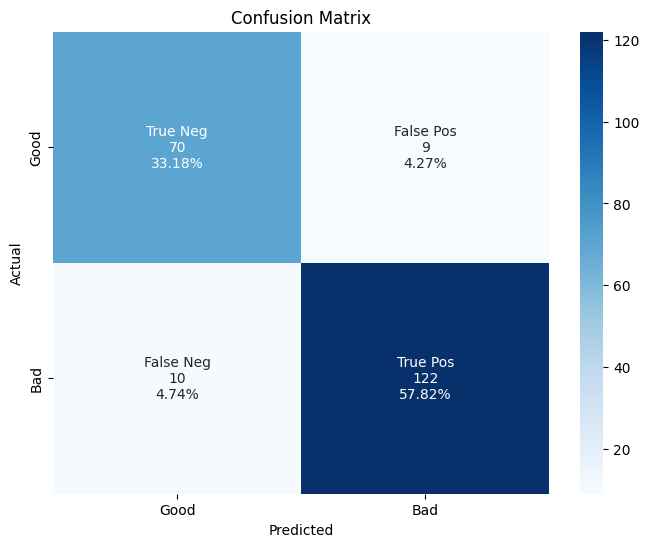

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           b       0.88      0.89      0.88        79
           g       0.93      0.92      0.93       132

    accuracy                           0.91       211
   macro avg       0.90      0.91      0.90       211
weighted avg       0.91      0.91      0.91       211



In [60]:
randomForest(0.6, 100, 'entropy')

Confusion Matrix : 


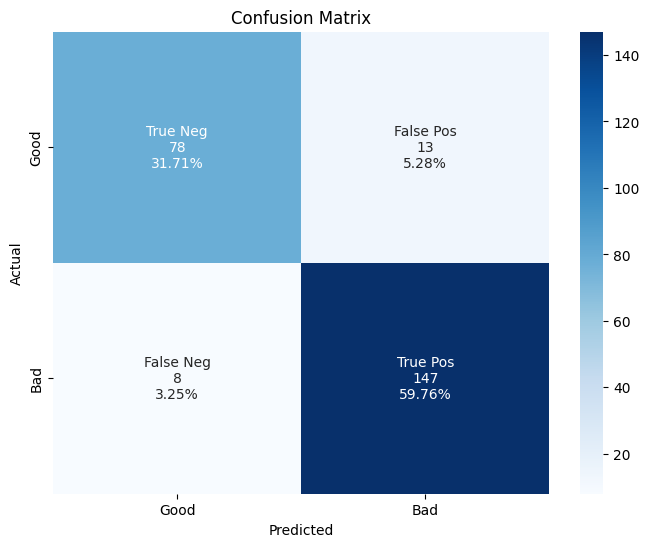

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           b       0.91      0.86      0.88        91
           g       0.92      0.95      0.93       155

    accuracy                           0.91       246
   macro avg       0.91      0.90      0.91       246
weighted avg       0.91      0.91      0.91       246



In [61]:
randomForest(0.7, 120)

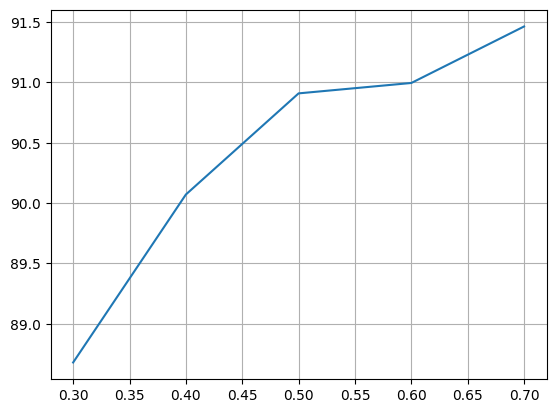

In [62]:
x_points = [float(key) for key in dict_rfr]
y_points = [i*100 for i in dict_rfr.values()]
plt.plot(x_points, y_points)
plt.grid(True)
plt.show()